#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
#import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, Input, LSTM, BatchNormalization, GRU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#Read Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! find . -name ".DS_Store" -delete

df = pd.DataFrame(columns=['Origin','Name'])
dirname = '/content/drive/MyDrive/train'
filenames = [f for f in os.listdir(dirname)]
for filename in filenames:
    file = open(f'{dirname}/{filename}', 'r')
    Lines = file.readlines()
    for line in Lines:
        df.loc[len(df)] = [filename[:-4], line.strip()]

#Preprocessing

In [ ]:
chars = set()
for word in df['Name']:
    chars.update(word)

In [ ]:
longest_string = df['Name'].str.len().max()

In [ ]:
def encode(my_word, chars = chars, max_len = longest_string):
    char_indices = dict((c, i) for i, c in enumerate(chars))
    x = np.zeros((max_len, len(chars)))
    for i, c in enumerate(my_word):
        x[i, char_indices[c]] = 1
    return x

In [ ]:
X = []
for j, word in enumerate(df['Name']):
    X.append(encode(word, chars, longest_string))
X = np.array(X)

In [ ]:
y = pd.get_dummies(df['Origin'])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1)

#Modeling

###Modeling With GRU

In [ ]:
model = Sequential()
model.add(GRU(units=256,
					input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(units=y.shape[1],
					activation='sigmoid'))
model.compile(optimizer= Adam(),
					loss='categorical_crossentropy',
                    metrics = ['AUC'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
epochs = 120
batch_size = 1024

history = model.fit(X_train,
                    y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data=(X_valid,y_valid))

Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 914ms/step - AUC: 0.7679 - loss: 2.6874 - val_AUC: 0.8797 - val_loss: 1.9340
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 918ms/step - AUC: 0.8731 - loss: 1.8745 - val_AUC: 0.8837 - val_loss: 1.8004
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 880ms/step - AUC: 0.8789 - loss: 1.8165 - val_AUC: 0.8836 - val_loss: 1.7451
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 904ms/step - AUC: 0.8822 - loss: 1.7374 - val_AUC: 0.8812 - val_loss: 1.6462
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 916ms/step - AUC: 0.8771 - loss: 1.6370 - val_AUC: 0.8716 - val_loss: 1.6020
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 875ms/step - AUC: 0.8691 - loss: 1.5974 - val_AUC: 0.8702 - val_loss: 1.5652
Epoch 7/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 922ms/step - AUC: 0.8682 - loss: 1.5524 - val_AUC: 0.8678 - val_loss: 1.5511
Epoch 8/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 864ms/step - AUC: 0.8678 - loss: 1.5270 - val_AUC: 0.8732 - val_loss: 1.5128
Epoch 9/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 2

#Displaying the AUC metric graph for the GRU model

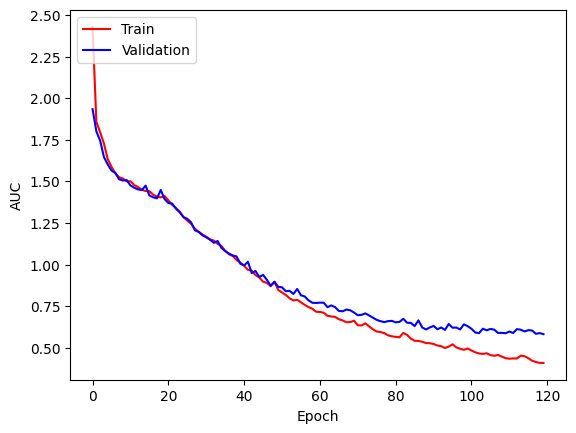

In [15]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###Modeling With LSTM

In [16]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=256,
					input_shape=(X_train.shape[1],X_train.shape[2])))
lstm_model.add(Dense(units=y.shape[1],
					activation='sigmoid'))
lstm_model.compile(optimizer= Adam(),
					loss='categorical_crossentropy',
                    metrics = ['AUC'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
epochs = 120
batch_size = 1024

history = lstm_model.fit(X_train,
                    y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data=(X_valid,y_valid))

Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 962ms/step - AUC: 0.7768 - loss: 2.5817 - val_AUC: 0.8802 - val_loss: 1.8244
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - AUC: 0.8800 - loss: 1.7766 - val_AUC: 0.8820 - val_loss: 1.6576
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 952ms/step - AUC: 0.8767 - loss: 1.6540 - val_AUC: 0.8781 - val_loss: 1.5545
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 960ms/step - AUC: 0.8762 - loss: 1.5463 - val_AUC: 0.8820 - val_loss: 1.5176
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 963ms/step - AUC: 0.8802 - loss: 1.5162 - val_AUC: 0.8857 - val_loss: 1.4829
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 915ms/step - AUC: 0.8863 - loss: 1.4734 - val_AUC: 0.8897 - val_loss: 1.4182
Epoch 7/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 921ms/step - AUC: 0.8910 - loss: 1.4096 - val_AUC: 0.8975 - val_loss: 1.3353
Epoch 8/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 975ms/step - AUC: 0.9011 - loss: 1.3181 - val_AUC: 0.9035 - val_loss: 1.2771
Epoch 9/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 

#Displaying the AUC metric graph for the LSTM model

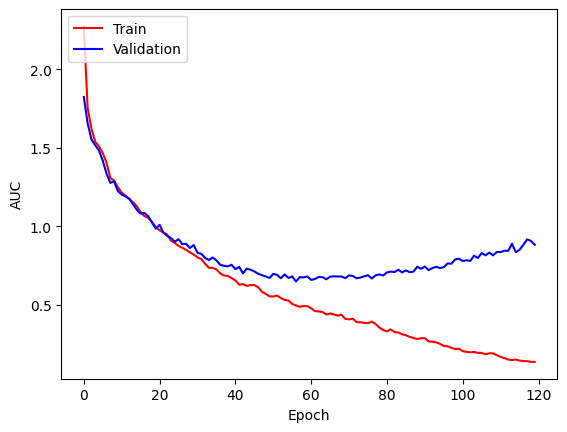

In [18]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Modeling With Simple RNN

In [19]:
simpleRNN_model = Sequential()
simpleRNN_model.add(SimpleRNN(units=256,
					input_shape=(X_train.shape[1],X_train.shape[2])))
simpleRNN_model.add(Dense(units=y.shape[1],
					activation='sigmoid'))
simpleRNN_model.compile(optimizer= Adam(),
					loss='categorical_crossentropy',
                    metrics = ['AUC'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
epochs = 120
batch_size = 1024

history = simpleRNN_model.fit(X_train,
                    y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data=(X_valid,y_valid))

Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 240ms/step - AUC: 0.7955 - loss: 2.1980 - val_AUC: 0.8960 - val_loss: 1.5638
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 323ms/step - AUC: 0.9080 - loss: 1.4693 - val_AUC: 0.9256 - val_loss: 1.2811
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - AUC: 0.9316 - loss: 1.2424 - val_AUC: 0.9380 - val_loss: 1.1601
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 317ms/step - AUC: 0.9441 - loss: 1.1304 - val_AUC: 0.9457 - val_loss: 1.0984
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - AUC: 0.9519 - loss: 1.0549 - val_AUC: 0.9524 - val_loss: 1.0356
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 362ms/step - AUC: 0.9581 - loss: 0.9919 - val_AUC: 0.9581 - val_loss: 0.9700
Epoch 7/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - AUC: 0.9618 - loss: 0.9398 - val_AUC: 0.9595 - val_loss: 0.9343
Epoch 8/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 342ms/step - AUC: 0.9639 - loss: 0.8997 - val_AUC: 0.9621 - val_loss: 0.9128
Epoch 9/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/

#Displaying the AUC metric graph for the Simple RNN model

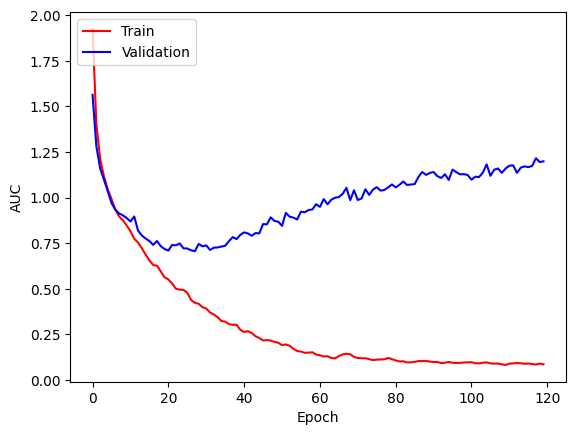

In [21]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Comparing the results of all three models in one chart

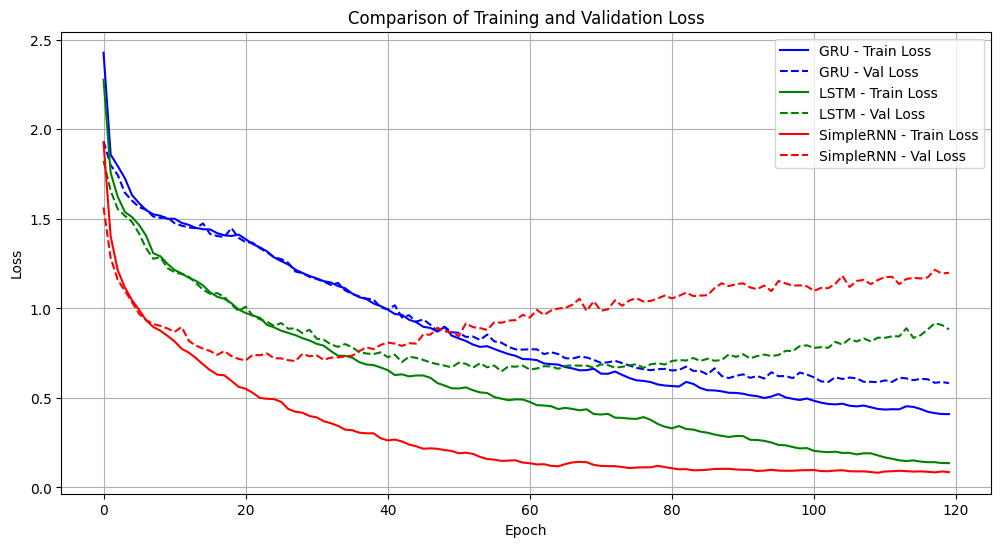

In [22]:
gru_loss = model.history.history['loss']
gru_val_loss = model.history.history['val_loss']

lstm_loss = lstm_model.history.history['loss']
lstm_val_loss = lstm_model.history.history['val_loss']

simple_loss = simpleRNN_model.history.history['loss']
simple_val_loss = simpleRNN_model.history.history['val_loss']

plt.figure(figsize=(12,6))
plt.plot(gru_loss, label='GRU - Train Loss', color='blue')
plt.plot(gru_val_loss, label='GRU - Val Loss', linestyle='--', color='blue')

plt.plot(lstm_loss, label='LSTM - Train Loss', color='green')
plt.plot(lstm_val_loss, label='LSTM - Val Loss', linestyle='--', color='green')

plt.plot(simple_loss, label='SimpleRNN - Train Loss', color='red')
plt.plot(simple_val_loss, label='SimpleRNN - Val Loss', linestyle='--', color='red')

plt.title('Comparison of Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
